<a href="https://colab.research.google.com/github/akashpambhar21/CE005_ML_AkashPambhar/blob/main/ML_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np


#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [ ]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)
Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)
Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)
Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)
Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


Features: ((1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1))
[1]


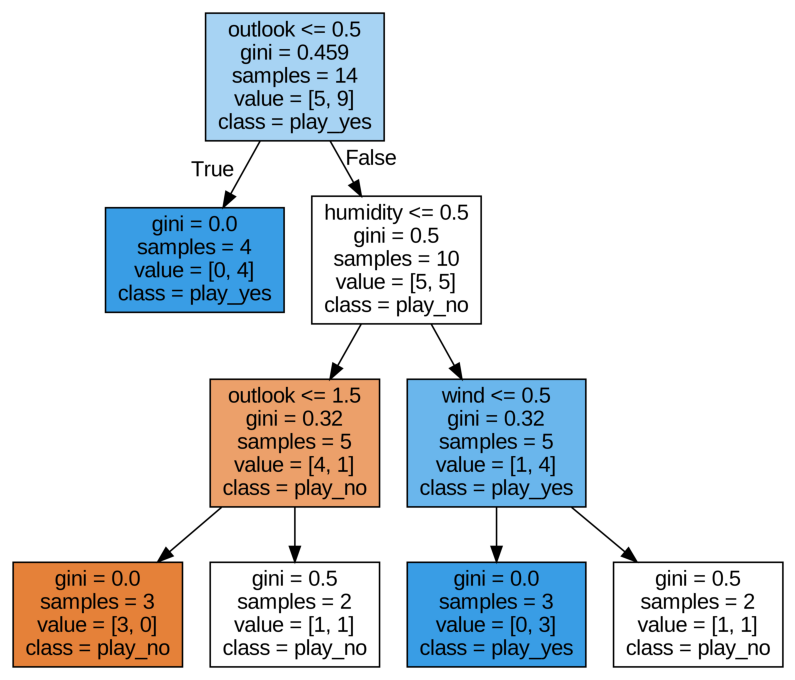

In [ ]:
# Merge different features to prepare dataset
features=tuple(zip(Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded))
print("Features:",features)

#Create a Decision Tree Classifier (using Entropy)
# Train the model using the training sets
model=DecisionTreeClassifier(max_depth=3)
model.fit(features,Play_encoded)

#Predict Output
print(model.predict([[1,0,1,0]]))


from sklearn.tree import export_graphviz
export_graphviz(model,out_file='tree_entropy.dot',feature_names=['outlook','temperature','humidity','wind'],
class_names=['play_no','play_yes'],filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

# Excersice:

Question 1: - What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?

In [ ]:
print(clf.predict([[1,2,1,0]]))

[1]


Question 2: -
What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity
=’High’, and Wind = ’True’?

In [ ]:
print(clf.predict([[2,0,0,1]]))

[0]


Question 4:- Accuracy , precision and recall of both Models?


In [ ]:
from sklearn.metrics import precision_score,recall_score

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

precision = precision_score(y_test,y_pred)
print("Precision: {}".format(precision))

recall = recall_score(y_test,y_pred)
print("Pred: {}".format(recall))

Accuracy: 0.7142857142857143
Precision: 1.0
Pred: 0.6


Exercise-6

In [ ]:
clf = DecisionTreeClassifier(max_depth=2,random_state = 5,max_leaf_nodes=5)
x=data
y=Play_encoded
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=5)
clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

precision = precision_score(y_test,y_pred)
print("Precision: {}".format(precision))

recall = recall_score(y_test,y_pred)
print("Pred: {}".format(recall))

Accuracy: 0.42857142857142855
Precision: 0.3333333333333333
Pred: 0.3333333333333333


Exercise-7


In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
data1 = load_iris()
X = data1.data
y = data1.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 5 , test_size = 0.25)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 5,max_leaf_nodes=5)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas

Test data accuracy: 0.9210526315789473


array([0.        , 0.01603802, 0.28066528, 0.33633825])